# Definição do Problema de Negócio:

Customer Churn (ou Rotatividade de Clientes, em uma tradução livre)
refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento
comercial. Refere-se também à perda de clientes. A fidelidade do cliente e a
rotatividade de clientes sempre somam 100%. Se uma empresa tem uma taxa de
fidelidade de 60%, então a taxa de perda de clientes é de 40%. De acordo com a
regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da
receita. Portanto, é muito importante prever os usuários que provavelmente
abandonarão o relacionamento comercial e os fatores que afetam as decisões do
cliente.
Neste projeto, você deve prever o Customer Churn em uma Operadora de
Telecom.

Importanto os pacotes necessários para a execução do projeto

In [152]:
import sklearn as sl
import warnings
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pickle
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
warnings.simplefilter(action='ignore', category=FutureWarning)

Leitura da base de treino

In [8]:
#Leitura do arquivo
df_churn = pd.read_csv("projeto4_telecom_treino.csv")

Visualizar um sample da base de treino

In [9]:
df_churn.head(10)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
5,6,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
6,7,MA,121,area_code_510,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
7,8,MO,147,area_code_415,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
8,9,LA,117,area_code_408,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
9,10,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


# Análise Exploratória de Dados


Verificando o tipo das colunas

In [18]:
df_churn.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

Verificando as variaveis que são String (Quantidade de observação em cada tipo)

In [10]:
df_churn.groupby("state").size()

state
AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
dtype: int64

In [11]:
df_churn.groupby("area_code").size()

area_code
area_code_408     838
area_code_415    1655
area_code_510     840
dtype: int64

In [12]:
df_churn.groupby("international_plan").size()

international_plan
no     3010
yes     323
dtype: int64

In [13]:
df_churn.groupby("voice_mail_plan").size()

voice_mail_plan
no     2411
yes     922
dtype: int64

# Pré-Processamento

Transformando cada uma das strings da variável state para um ID

In [23]:
df_churn['id_state'] = pd.factorize(df_churn.state)[0]

In [32]:
df_churn.groupby(["state","id_state"]).size()

state  id_state
AK     28           52
AL     4            80
AR     30           55
AZ     20           64
CA     36           34
CO     19           66
CT     49           74
DC     43           54
DE     34           61
FL     18           63
GA     27           54
HI     24           53
IA     11           44
ID     14           73
IL     25           58
IN     9            71
KS     0            70
KY     44           59
LA     7            51
MA     5            65
MD     29           70
ME     45           62
MI     33           73
MN     37           84
MO     6            63
MS     46           65
MT     12           68
NC     39           68
ND     50           62
NE     22           61
NH     26           56
NJ     2            68
NM     41           62
NV     42           66
NY     13           83
OH     1            78
OK     3            61
OR     32           78
PA     48           45
RI     10           65
SC     21           60
SD     38           60
TN     47         

Criando colunas com os respectivos valores binarizados 

In [34]:
df_churn['area_code_408'] = df_churn['area_code'].apply(lambda x : 1 if x == 'area_code_408' else 0)
df_churn['area_code_415'] = df_churn['area_code'].apply(lambda x : 1 if x == 'area_code_415' else 0)
df_churn['area_code_510'] = df_churn['area_code'].apply(lambda x : 1 if x == 'area_code_510' else 0)

Validação dos valores em cada uma das variáveis criadas

In [38]:
df_churn.groupby('area_code_408').size()

area_code_408
0    2495
1     838
dtype: int64

In [39]:
df_churn.groupby('area_code_415').size()

area_code_415
0    1678
1    1655
dtype: int64

In [40]:
df_churn.groupby('area_code_510').size()

area_code_510
0    2493
1     840
dtype: int64

Binarizando as variáveis e validando os registros após execução

In [41]:
df_churn['id_international_plan'] = df_churn['international_plan'].apply(lambda x : 1 if x == 'yes' else 0)

In [42]:
df_churn.groupby(["international_plan","id_international_plan"]).size()

international_plan  id_international_plan
no                  0                        3010
yes                 1                         323
dtype: int64

In [43]:
df_churn['id_voice_mail_plann'] = df_churn['voice_mail_plan'].apply(lambda x : 1 if x == 'yes' else 0)

In [46]:
df_churn.groupby(["voice_mail_plan","id_voice_mail_plann"]).size()

voice_mail_plan  id_voice_mail_plann
no               0                      2411
yes              1                       922
dtype: int64

In [48]:
df_churn['class'] = df_churn['churn'].apply(lambda x : 1 if x == 'yes' else 0)

In [49]:
df_churn.groupby(["churn","class"]).size()

churn  class
no     0        2850
yes    1         483
dtype: int64

Selecionando somente as variáveis que vamos utilizar no treinamento do modelo

In [120]:
df_churn_transf = df_churn[["account_length", "account_length","number_vmail_messages","total_day_minutes","total_day_calls","total_day_charge","total_eve_minutes","total_eve_calls","total_eve_charge","total_night_minutes","total_night_calls","total_night_charge","total_intl_minutes","total_intl_calls","total_intl_charge","number_customer_service_calls","id_state","area_code_408","area_code_415","area_code_510","id_international_plan","id_voice_mail_plann","class"]]

Sample dos dados

In [121]:
df_churn_transf.head(10)

,account_length,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_intl_calls,total_intl_charge,number_customer_service_calls,id_state,area_code_408,area_code_415,area_code_510,id_international_plan,id_voice_mail_plann,class
0,128,128,25,265.1,110,45.07,197.4,99,16.78,244.7,...,3,2.70,1,0,0,1,0,0,1,0
1,107,107,26,161.6,123,27.47,195.5,103,16.62,254.4,...,3,3.70,1,1,0,1,0,0,1,0
2,137,137,0,243.4,114,41.38,121.2,110,10.30,162.6,...,5,3.29,0,2,0,1,0,0,0,0
3,84,84,0,299.4,71,50.90,61.9,88,5.26,196.9,...,7,1.78,2,1,1,0,0,1,0,0
4,75,75,0,166.7,113,28.34,148.3,122,12.61,186.9,...,3,2.73,3,3,0,1,0,1,0,0
5,118,118,0,223.4,98,37.98,220.6,101,18.75,203.9,...,6,1.70,0,4,0,0,1,1,0,0
6,121,121,24,218.2,88,37.09,348.5,108,29.62,212.6,...,7,2.03,3,5,0,0,1,0,1,0
7,147,147,0,157.0,79,26.69,103.1,94,8.76,211.8,...,6,1.92,0,6,0,1,0,1,0,0
8,117,117,0,184.5,97,31.37,351.6,80,29.89,215.8,...,4,2.35,1,7,1,0,0,0,0,0
9,141,141,37,258.6,84,43.96,222.0,111,18.87,326.4,...,5,3.02,0,8,0,1,0,1,1,0


Quantidade de colunas

In [122]:
len(df_churn_transf.columns)

23

# Análise Exploratória de Dados após pré processamento

Matriz de Correlação

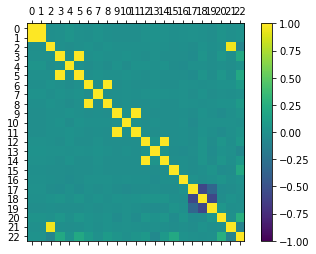

In [191]:
correlations = df_churn_transf.corr()

# Plot
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 23, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

Histograma para verificar a distribuição de cada um das variáveis

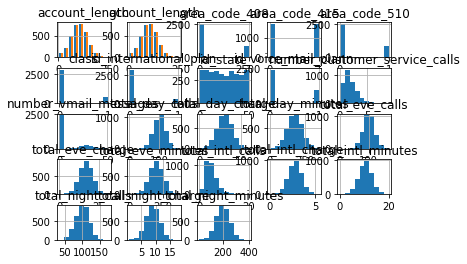

In [185]:
df_churn_transf.hist()
plt.show()

# Gerando o modelo utilizando o algorit. Regressão Logística

In [192]:
array = df_churn_transf.values
X = array[:,0:22]
Y = array[:,22]

In [193]:
# Criando o modelo
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(X, Y)

# Salvando o modelo
arquivo = 'modelo_classificador_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


# Lendo os dados de teste e aplicando todas as transformações realizadas na base de treino

In [129]:
df_churn_test = pd.read_csv("projeto4_telecom_teste.csv")

In [130]:
df_churn_test['id_state'] = pd.factorize(df_churn_test.state)[0]
df_churn_test['area_code_408'] = df_churn_test['area_code'].apply(lambda x : 1 if x == 'area_code_408' else 0)
df_churn_test['area_code_415'] = df_churn_test['area_code'].apply(lambda x : 1 if x == 'area_code_415' else 0)
df_churn_test['area_code_510'] = df_churn_test['area_code'].apply(lambda x : 1 if x == 'area_code_510' else 0)
df_churn_test['id_international_plan'] = df_churn_test['international_plan'].apply(lambda x : 1 if x == 'yes' else 0)
df_churn_test['id_voice_mail_plann'] = df_churn_test['voice_mail_plan'].apply(lambda x : 1 if x == 'yes' else 0)
df_churn_test['class'] = df_churn_test['churn'].apply(lambda x : 1 if x == 'yes' else 0)

Selecionando as variáveis necessárias. 

In [136]:
df_churn_test_transf = df_churn_test[["account_length", "account_length","number_vmail_messages","total_day_minutes","total_day_calls","total_day_charge","total_eve_minutes","total_eve_calls","total_eve_charge","total_night_minutes","total_night_calls","total_night_charge","total_intl_minutes","total_intl_calls","total_intl_charge","number_customer_service_calls","id_state","area_code_408","area_code_415","area_code_510","id_international_plan","id_voice_mail_plann","class"]]

Carregando o modelo e gerando a Acurácia.

In [183]:
array = df_churn_test_transf.values
X_teste = array[:,0:22]
Y_teste = array[:,22]

# Carregando o arquivo
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.score(X_teste, Y_teste)
print("Modelo carregado!")

# Print do resultado
print("Acurácia: %.3f" % (modelo_prod.mean() * 100))

Modelo carregado!
Acurácia: 87.343


Gerando a Confusion Matrix

In [184]:
previsoes = modelo_classificador_final.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(matrix)

[[1415   28]
 [ 183   41]]
